In [59]:
# Checking package versions
import sys
print('Python: {}'.format(sys.version))
# SciPy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
scipy: 1.3.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


In [60]:
# ingnoring all warnings
import warnings
warnings.filterwarnings("ignore")

In [61]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
# from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
# from sklearn import preprocessing

In [62]:
# importing data
filepath = './NSE-TATAGLOBAL11.csv'
df = pd.read_csv(filepath, parse_dates = True,index_col=0)

In [63]:
# checking data
df.head(5)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [64]:
# checking the overall information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
Open                    1235 non-null float64
High                    1235 non-null float64
Low                     1235 non-null float64
Last                    1235 non-null float64
Close                   1235 non-null float64
Total Trade Quantity    1235 non-null float64
Turnover (Lacs)         1235 non-null float64
dtypes: float64(7)
memory usage: 77.2 KB


In [65]:
# checking for null values
df.isnull().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [66]:
# checking for duplicated values
df.duplicated().any()

False

In [67]:
# Statistical Summary
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [68]:
# separating independent variables from dependent variable
df_features = df.drop(['Close', 'Total Trade Quantity', 'Turnover (Lacs)'], axis=1)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 4 columns):
Open    1235 non-null float64
High    1235 non-null float64
Low     1235 non-null float64
Last    1235 non-null float64
dtypes: float64(4)
memory usage: 48.2 KB


In [69]:
# correlation of independent variables
df_features.corr()

,Open,High,Low,Last
Open,1.000000,0.998956,0.998776,0.997662
High,0.998956,1.000000,0.998728,0.999130
Low,0.998776,0.998728,1.000000,0.999008
Last,0.997662,0.999130,0.999008,1.000000


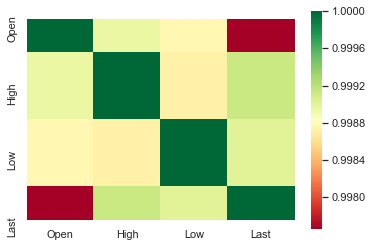

In [70]:
# visualizing correlation of independent variables
sns.heatmap(df_features.corr(), square=True, cmap='RdYlGn')

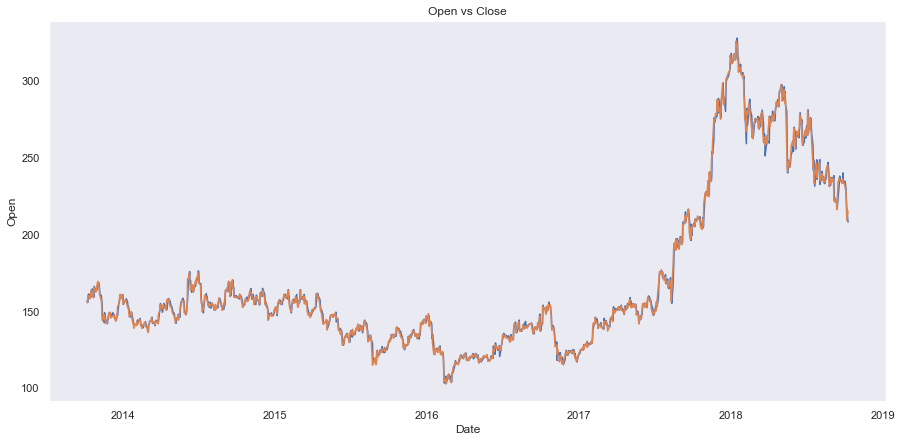

In [71]:
# time series
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(df.Open)
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Open vs Close')
plt.show()

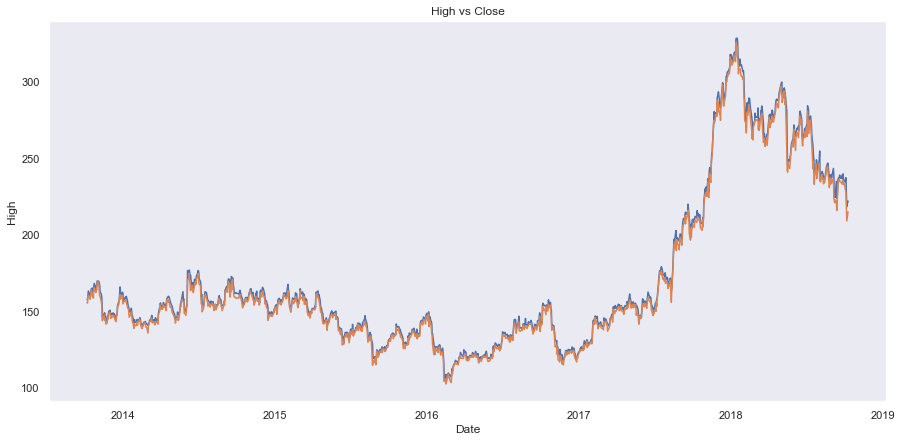

In [72]:
# time series
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(df.High)
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('High')
plt.title('High vs Close')
plt.show()

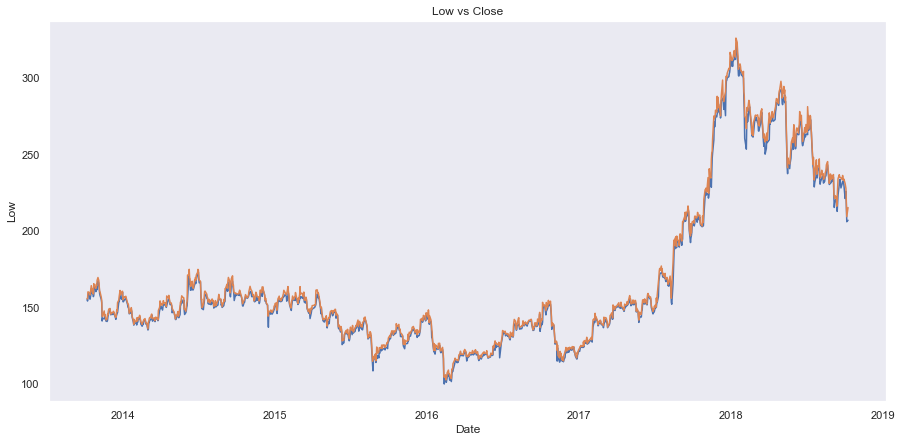

In [73]:
# time series
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(df.Low)
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Low vs Close')
plt.show()

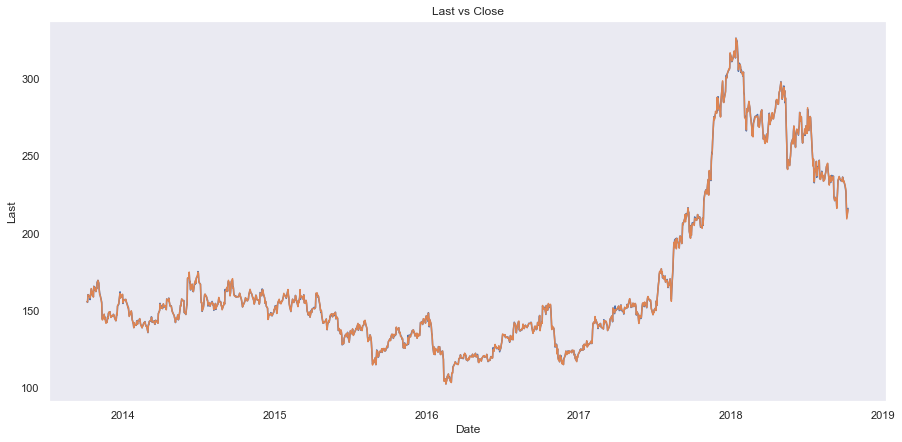

In [74]:
# time series
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(df.Last)
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Last')
plt.title('Last vs Close')
plt.show()

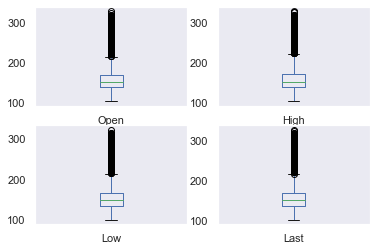

In [75]:
# Data visualization
# Univariate Plots
# box and whisker plots for each Input variable
df_features.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

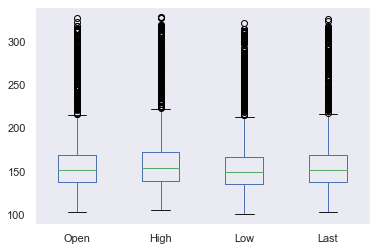

In [76]:
df_features.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False)
plt.show()

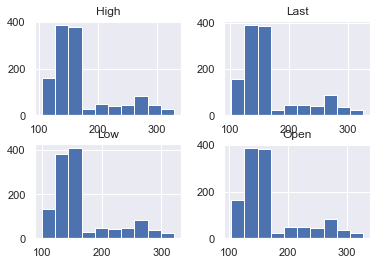

In [77]:
# Histogram for each input variable
df_features.hist()
plt.show()

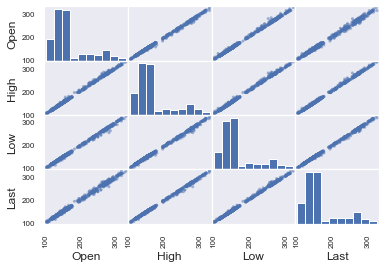

In [78]:
# Multivariate Plots
# scatter matrix plot for each input variable
scatter_matrix(df_features)
plt.show()

In [79]:
X = df_features.values
y = df['Close'].values

In [80]:
# Using Linear regression model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20 , random_state = 21)
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
linear_prediction = linear_reg.predict(X_test)
linear_score = linear_reg.score(X_test,y_test)*100
print('linear_score:',format(linear_score, '.3f'))

linear_cv = cross_val_score(linear_reg, X, y, cv = 5)
linear_cv_score = np.mean(linear_cv)*100
print('linear_cv_score:',format(linear_cv_score, '.3f'))

linear_error = mean_absolute_error(y_test, linear_prediction)
print('linear_error:',format(linear_error, '.3f'))

linear_reg_rmse = sqrt(mean_squared_error(y_test, linear_prediction))
print('RMSE:', format(linear_reg_rmse,'.3f'))

linear_score: 99.995
linear_cv_score: 99.919
linear_error: 0.250
RMSE: 0.367


In [81]:
# Using Ridge regression model
ridge = Ridge(alpha = 0.001, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_score = ridge.score(X_test, y_test)*100
print('ridge_score:',format(ridge_score, '.3f'))

ridge_cv = cross_val_score(ridge, X, y, cv=5)
ridge_cv_score = np.mean(ridge_cv)*100
print('ridge_cv_score:',format(ridge_cv_score, '.3f'))

ridge_error = mean_absolute_error(y_test, ridge_pred)
print('ridge_error:',format(ridge_error, '.3f'))

ridge_rmse = sqrt(mean_squared_error(y_test, ridge_pred))
print('RMSE:', format(ridge_rmse,'.3f'))

ridge_score: 99.983
ridge_cv_score: 99.831
ridge_error: 0.474
RMSE: 0.671


In [82]:
# Using lasso regression model
lasso = Lasso(alpha = 1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_score = lasso.score(X_test, y_test)*100
print('lasso_score:',format(lasso_score, '.3f'))

lasso_cv = cross_val_score(lasso, X, y, cv = 5)
lasso_cv_score = np.mean(lasso_cv)
print('lasso_cv_score:',format(lasso_cv_score, '.3f'))

lasso_error = mean_absolute_error(y_test, lasso_pred)
print('lasso_error:',format(lasso_error, '.3f'))

lasso_rmse = sqrt(mean_squared_error(y_test, lasso_pred))
print('RMSE:',format(lasso_rmse,'.3f'))

lasso_score: 62.992
lasso_cv_score: -5.063
lasso_error: 23.942
RMSE: 30.975


In [83]:
# preprocessing data 
# Ben = preprocessing.Binarizer(threshold=0.1).transform(df_features)
# scale = preprocessing.MinMaxScaler(feature_range=(0,1))
# X_scaled = scale.fit_transform(df_features)

# y_new = df['Close'].values
# y_reshaped = np.reshape(y_new, (-1, 1))
# y_scaled = scale.fit_transform(y_reshaped)

In [84]:
# Using BayesianRidge regression model
bay_ridge = BayesianRidge(alpha_1=1e-06, lambda_1=1e-06, normalize=True)
bay_ridge.fit(X_train, y_train)
bay_ridge_pred = bay_ridge.predict(X_test)
bay_score = bay_ridge.score(X_test, y_test)*100
print('bay_score:',format(bay_score, '.3f'))

bay_ridge_cv = cross_val_score(bay_ridge, X, y, cv=5)
bay_ridge_cv_score = np.mean(bay_ridge_cv)*100
print('bay_ridge_cv_score:',format(bay_ridge_cv_score, '.3f'))

bay_ridge_error = mean_absolute_error(y_test, bay_ridge_pred)
print('bay_ridge_error:',format(bay_ridge_error, '.3f'))

bay_score: 99.995
bay_ridge_cv_score: 99.919
bay_ridge_error: 0.250


In [85]:
# Using HuberRegressor model
huber = HuberRegressor(alpha=0.001)
huber.fit(X_train, y_train)
huber_pred = huber.predict(X_test)
huber_score = huber.score(X_test, y_test)
print('huber_score:',format(huber_score, '.3f'))

huber_cv = cross_val_score(huber, X, y, cv=5)
huber_cv_score = np.mean(huber_cv)*100
print('huber_cv_score:',format(huber_cv_score, '.3f'))

huber_error = mean_absolute_error(y_test, huber_pred)
print('huber_error:',format(huber_error, '.3f'))

huber_score: 1.000
huber_cv_score: 99.919
huber_error: 0.251


In [86]:
# # Using ElasticNet
# EN = ElasticNet(alpha = 0.001, normalize = True)
# EN.fit(X_train, y_train)
# EN_pred = EN.predict(X_test)
# EN_score = EN.score(X_test, y_test)*100
# print('EN_score:',format(EN_score, '.3f'))

# EN_cv = cross_val_score(EN, X, y, cv=5)
# EN_cv_score = np.mean(EN_cv)*100
# print('EN_cv_score:',format(EN_cv_score, '.3f'))

# EN_error = mean_absolute_error(y_test, EN_pred)
# print('EN_error:',format(EN_error, '.3f'))

In [87]:
# Using AdaBoostRegressor
ADR = AdaBoostRegressor()
ADR.fit(X_train, y_train)
ADR_pred = ADR.predict(X_test)
ADR_score = ADR.score(X_test, y_test)*100
print('ADR_score:', format(ADR_score, '.3f'))

ADR_cv = cross_val_score(ADR, X, y, cv=5)
ADR_cv_score = np.mean(ADR_cv)*100
print('Mean_cv_score:', format(ADR_cv_score, '.3f'))

ADR_error = mean_absolute_error(y_test, ADR_pred)
print('Mean_absolute_error:', format(ADR_error, '.3f'))

ADR_score: 99.712
Mean_cv_score: 3.468
Mean_absolute_error: 2.042


In [88]:
# Using BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train, y_train)
BR_pred = BR.predict(X_test)
BR_score = BR.score(X_test, y_test)*100
print('BR_score:', format(BR_score, '.3f'))

BR_cv = cross_val_score(BR, X, y, cv=5)
BR_cv_score = np.mean(BR_cv)*100
print('Mean_cv_score:', format(BR_cv_score, '.3f'))

BR_error = mean_absolute_error(y_test, BR_pred)
print('Mean_absolute_error:', format(BR_error, '.3f'))

BR_score: 99.971
Mean_cv_score: 21.570
Mean_absolute_error: 0.485


In [89]:
# Using GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
GBR_pred = GBR.predict(X_test)
GBR_score = GBR.score(X_test, y_test)*100
print('GBR_score:', format(GBR_score, '.3f'))

GBR_cv = cross_val_score(GBR, X, y, cv=5)
GBR_cv_score = np.mean(GBR_cv)*100
print('Mean_cv_score:', format(GBR_cv_score, '.3f'))

GBR_error = mean_absolute_error(y_test, GBR_pred)
print('Mean_absolute_error:', format(GBR_error, '.3f'))

GBR_score: 99.973
Mean_cv_score: 24.198
Mean_absolute_error: 0.521


In [90]:
# Using RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR_pred = RFR.predict(X_test)
RFR_score = RFR.score(X_test, y_test)*100
print('RFR_score:', format(RFR_score, '.3f'))

RFR_cv = cross_val_score(RFR, X, y, cv=5)
RFR_cv_score = np.mean(RFR_cv)*100
print('Mean_cv_score:', format(RFR_cv_score, '.3f'))

RFR_error = mean_absolute_error(y_test, RFR_pred)
print('Mean_absolute_error:', format(RFR_error, '.3f'))

RFR_score: 99.964
Mean_cv_score: 22.053
Mean_absolute_error: 0.502


### Building models together

In [91]:
models = []
models.append(('LinR', LinearRegression(normalize=True)))
models.append(('Ridge', Ridge(alpha=1, normalize=True)))
models.append(('Bay', BayesianRidge(n_iter=500, normalize=True)))
models.append(('Las', Lasso(alpha=1, normalize=True)))
models.append(('HR', HuberRegressor(alpha=1)))
models.append(('ADR', AdaBoostRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
# models.append(('EN', ElasticNet(alpha = 1, normalize = True)))

In [92]:
# Evaluting each model
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LinR: 0.999930 (0.000011)
Ridge: 0.958638 (0.001826)
Bay: 0.999930 (0.000011)
Las: 0.664915 (0.003271)
HR: 0.999930 (0.000011)
ADR: 0.997540 (0.000811)
BR: 0.999710 (0.000128)
GBR: 0.999776 (0.000052)
RFR: 0.999760 (0.000101)


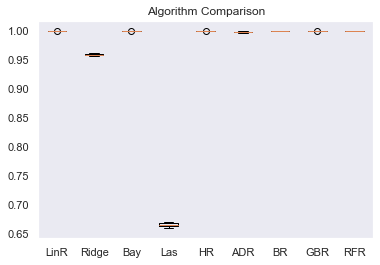

In [93]:
# Comparing Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [94]:
linear_prediction

array([140.89937725, 127.74034636, 277.44667181, 155.90510196,
       120.95666167, 209.3368032 , 122.65094317, 161.2230964 ,
       159.81575163, 134.97884174, 152.59201966, 149.37565185,
       274.62723975, 142.49851653, 167.83696768, 139.53541776,
       158.58991337, 133.38830995, 303.98728753, 148.15422911,
       145.00771659, 140.91837486, 134.84040575, 134.7007187 ,
       242.37130551, 152.36011133, 149.59143659, 287.07121635,
       134.42730537, 234.74570303, 156.24637042, 121.90496929,
       146.0686885 , 134.01999982, 137.02340301, 164.61374767,
       141.31703706, 151.68731689, 143.05198057, 221.24941465,
       154.76691744, 152.98422726, 116.0119982 , 131.40337276,
       126.84033965, 156.50050979, 147.68392905, 144.18943684,
       159.7083289 , 142.25559738, 150.19280085, 167.04058356,
       206.70008602, 156.4968189 , 115.98442492, 136.78500322,
       142.93369317, 137.72020556, 142.35083074, 122.10453492,
       119.71671381, 246.99856725, 157.02522146, 223.00

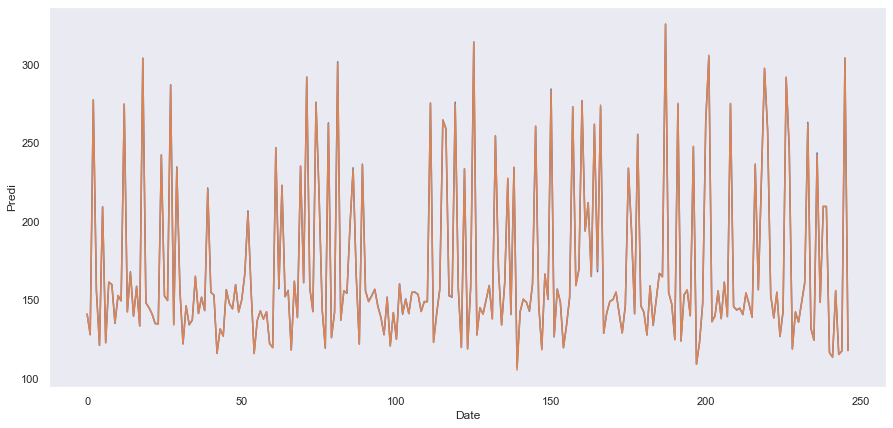

In [95]:
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(linear_prediction)
plt.plot(y_test)
plt.xlabel('Date')
plt.ylabel('Predi')
plt.show()

In [97]:
X_train

array([[152.45, 156.6 , 151.6 , 154.05],
       [139.15, 139.85, 136.75, 138.15],
       [129.05, 130.65, 127.35, 129.85],
       ...,
       [131.5 , 132.2 , 127.  , 130.  ],
       [161.15, 163.45, 159.  , 159.8 ],
       [161.05, 162.6 , 157.25, 157.65]])